## Importing Important Items

Libraries

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset

In [117]:
movies = pd.read_csv("datasets/TMDB_movie_dataset_v11.csv")
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261781 entries, 0 to 1261780
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1261781 non-null  int64  
 1   title                 1261768 non-null  object 
 2   vote_average          1261781 non-null  float64
 3   vote_count            1261781 non-null  int64  
 4   status                1261781 non-null  object 
 5   release_date          1019565 non-null  object 
 6   revenue               1261781 non-null  int64  
 7   runtime               1261781 non-null  int64  
 8   adult                 1261781 non-null  bool   
 9   backdrop_path         325569 non-null   object 
 10  budget                1261781 non-null  int64  
 11  homepage              131719 non-null   object 
 12  imdb_id               632145 non-null   object 
 13  original_language     1261781 non-null  object 
 14  original_title        1261768 non-

In [118]:
cols = ['id','title','release_date','overview','genres','keywords','status','poster_path']
movies[cols].head()

,id,title,release_date,overview,genres,keywords,status,poster_path
0,27205,Inception,2010-07-15,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",Released,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg
1,157336,Interstellar,2014-11-05,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",Released,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg
2,155,The Dark Knight,2008-07-16,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",Released,/qJ2tW6WMUDux911r6m7haRef0WH.jpg
3,19995,Avatar,2009-12-15,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",Released,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg
4,24428,The Avengers,2012-04-25,When an unexpected enemy emerges and threatens...,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",Released,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg


In [119]:
movies[cols].isnull().sum()

id                   0
title               13
release_date    242216
overview        273504
genres          530429
keywords        934865
status               0
poster_path     421968
dtype: int64

## Data Cleaning

In [120]:
movies = movies[cols].dropna()
print(movies[cols].isna().sum())
print(movies['id'].duplicated().sum())

id              0
title           0
release_date    0
overview        0
genres          0
keywords        0
status          0
poster_path     0
dtype: int64
15


In [121]:
duplicate_ids = movies[movies['id'].duplicated(keep=False)]
duplicate_ids.head(10)

,id,title,release_date,overview,genres,keywords,status,poster_path
286679,1199990,The Undead,2023-10-27,At the end of times a dysfunctional family tak...,"Horror, Thriller","undead, religion, dead children, religious horror",Released,/jsKHGufgfXgVXuiQ23MK6CtFPvN.jpg
286904,1199990,The Undead,2023-10-27,At the end of times a dysfunctional family tak...,"Horror, Thriller","undead, religion, dead children, religious horror",Released,/jsKHGufgfXgVXuiQ23MK6CtFPvN.jpg
401195,1215379,Fantasymphony II - A Concert of Fire and Magic,2023-11-17,Take the DR Symphony Orchestra and Jakob Stege...,Music,concert,Released,/5bhDrRFl9GTIzxhNr8bSy4QewmJ.jpg
401224,1215379,Fantasymphony II - A Concert of Fire and Magic,2023-11-17,Take the DR Symphony Orchestra and Jakob Stege...,Music,concert,Released,/5bhDrRFl9GTIzxhNr8bSy4QewmJ.jpg
407492,1232529,Leica Story,2016-10-03,Robert is a war photographer who moves to an a...,"History, Drama",spanish civil war (1936-39),Released,/cBNClPXVP7y9XVREUErPSKDLftG.jpg
407493,1232529,Leica Story,2016-10-03,Robert is a war photographer who moves to an a...,"History, Drama",spanish civil war (1936-39),Released,/cBNClPXVP7y9XVREUErPSKDLftG.jpg
409886,1232080,Nakamori Akina - Live In '87 A HUNDRED Days,1993-08-25,Live in '87 A HUNDRED days is the seventh vide...,Music,"concert, japanese music, idol",Released,/6DZw77g6B7GP19Wrpfmt2faxdT5.jpg
409888,1232080,Nakamori Akina - Live In '87 A HUNDRED Days,1993-08-25,Live in '87 A HUNDRED days is the seventh vide...,Music,"concert, japanese music, idol",Released,/6DZw77g6B7GP19Wrpfmt2faxdT5.jpg
416153,1225256,Redgey,2023-12-31,An orphaned raccoon happens to have a unique t...,Drama,"marionettes, puppets, short film, experimental",Released,/hal947LnnPNm3mXe66eJR1NrtQH.jpg
416154,1225256,Redgey,2023-12-31,An orphaned raccoon happens to have a unique t...,Drama,"marionettes, puppets, short film, experimental",Released,/hal947LnnPNm3mXe66eJR1NrtQH.jpg


In [122]:
movies.drop_duplicates(subset=['id'], inplace=True)
movies.reset_index(drop=True, inplace=True)
print(movies.duplicated().sum())

0


In [123]:
movies[cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197973 entries, 0 to 197972
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            197973 non-null  int64 
 1   title         197973 non-null  object
 2   release_date  197973 non-null  object
 3   overview      197973 non-null  object
 4   genres        197973 non-null  object
 5   keywords      197973 non-null  object
 6   status        197973 non-null  object
 7   poster_path   197973 non-null  object
dtypes: int64(1), object(7)
memory usage: 12.1+ MB


In [124]:
df = movies[cols]
df.head()

,id,title,release_date,overview,genres,keywords,status,poster_path
0,27205,Inception,2010-07-15,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",Released,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg
1,157336,Interstellar,2014-11-05,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",Released,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg
2,155,The Dark Knight,2008-07-16,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",Released,/qJ2tW6WMUDux911r6m7haRef0WH.jpg
3,19995,Avatar,2009-12-15,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",Released,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg
4,24428,The Avengers,2012-04-25,When an unexpected enemy emerges and threatens...,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",Released,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg


## Data Validation

In [125]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year

In [126]:
# Get 5 earliest movies (lowest years)
earliest_5 = df.nsmallest(5, 'release_year')[['title', 'release_year', 'release_date']]

# Get 5 most recent movies (highest years)
recent_5 = df.nlargest(5, 'release_year')[['title', 'release_year', 'release_date']]

print("5 Earliest Movies:")
print(earliest_5)
print("\n5 Most Recent Movies:")
print(recent_5)

5 Earliest Movies:
                     title  release_year release_date
17261     Passage of Venus          1874   1874-12-09
37378  The Musician Monkey          1878   1878-05-07
42070    The Magic Rosette          1878   1878-05-07
60081      Zim, Boum, Boum          1878   1878-05-07
60082      Le Jeu de Corde          1878   1878-05-07

5 Most Recent Movies:
                                                    title  release_year  \
143254     Jar Media The Movie - Part 3 - Alive Reckoning          2099   
147954  Fast X Part 2 2 Fast X Too Furious Too Serious...          2069   
146595                                             BadCop          2037   
150282                                Portal Quest 3: TDB          2030   
152786                           The Voices In FAO's Head          2029   

       release_date  
143254   2099-12-31  
147954   2069-09-11  
146595   2037-10-10  
150282   2030-07-01  
152786   2029-12-25  


In [127]:
# Check what status values exist
print("Available status values:")
print(df['status'].value_counts())

# Then filter
df_released = df[df['status'] == 'Released'].reset_index(drop=True)

Available status values:
status
Released           196101
In Production         963
Post Production       560
Planned               344
Rumored                 5
Name: count, dtype: int64


In [128]:
# Get 5 earliest movies (lowest years)
earliest_5 = df_released.nsmallest(5, 'release_year')[['title', 'release_year', 'release_date']]

# Get 5 most recent movies (highest years)
recent_5 = df_released.nlargest(5, 'release_year')[['title', 'release_year', 'release_date']]

print("5 Earliest Movies:")
print(earliest_5)
print("\n5 Most Recent Movies:")
print(recent_5)

5 Earliest Movies:
                     title  release_year release_date
17261     Passage of Venus          1874   1874-12-09
37378  The Musician Monkey          1878   1878-05-07
42070    The Magic Rosette          1878   1878-05-07
60081      Zim, Boum, Boum          1878   1878-05-07
60082      Le Jeu de Corde          1878   1878-05-07

5 Most Recent Movies:
                                title  release_year release_date
143133  National Theatre Live: Hamlet          2026   2026-01-22
145196           Lollipop Brainfreeze          2026   2026-09-15
146612                          Angel          2026   2026-01-01
149375              Jude on 17 memory          2026   2026-12-09
47564                    Purple Leone          2025   2025-05-25


Decade distribution:


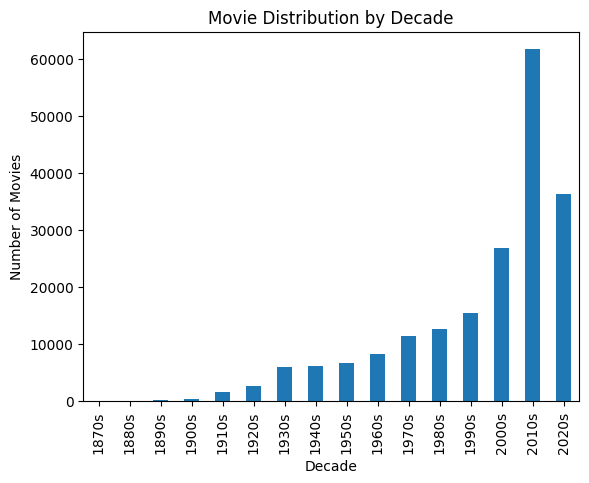

In [129]:
# Create decade column
df_released['decade'] = (df_released['release_year'] // 10) * 10
df_released['decade_label'] = df_released['decade'].astype(str) + 's'

# Show distribution
print("Decade distribution:")
decade_counts = df_released['decade_label'].value_counts().sort_index()
decade_counts.plot(kind='bar', xlabel='Decade', ylabel='Number of Movies', title='Movie Distribution by Decade')
plt.show()

In [130]:
# Subset the data to only include movies released between 1990 and 2025
df_released = df_released[(df_released['release_year'] >= 1990) & (df_released['release_year'] <= 2025)]
df_released.sort_values(by='release_year', ascending=False).head()

,id,title,release_date,overview,genres,keywords,status,poster_path,release_year,decade,decade_label
141309,1502807,5am,2025-06-23,A collection of solitary urban images intersec...,"Animation, Music, Mystery","urban, electronic music, downtempo, minimalism...",Released,/zNofimsy2D6qmvNvQFevVQGeLeE.jpg,2025,2020,2020s
141110,1503462,What to Film?,2025-06-24,Experimental documentary dissecting artistic i...,Documentary,"slice of life, essay film, experimental, exper...",Released,/zqTvHaY5BFjvVu4tKVZn5WONTCI.jpg,2025,2020,2020s
141114,1502669,CANTEEN,2025-06-09,"For three unforgettable years of high school, ...","Comedy, Drama, Romance","high school, friendship, coming of age",Released,/9ZgPo2piXJCfLLl6OqslJ4wCLtG.jpg,2025,2020,2020s
141089,1503476,Las Cosas Que Brillan,2025-08-03,A curious young mermaid defies her mother and ...,"Drama, Family, Fantasy","sea, mermaid, puppet, conquistador, hand puppe...",Released,/azPxfFxInVjz25BkKmyL6PYZoPi.jpg,2025,2020,2020s
141094,1503497,One Day on Valentine,2025-02-14,Ditra believes that love is worth fighting for...,Romance,"one day, suatu ketika",Released,/x3yLwKbJTFFgyxDOKZTTItEbjzA.jpg,2025,2020,2020s


In [131]:
df_released.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140092 entries, 0 to 196099
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            140092 non-null  int64         
 1   title         140092 non-null  object        
 2   release_date  140092 non-null  datetime64[ns]
 3   overview      140092 non-null  object        
 4   genres        140092 non-null  object        
 5   keywords      140092 non-null  object        
 6   status        140092 non-null  object        
 7   poster_path   140092 non-null  object        
 8   release_year  140092 non-null  int32         
 9   decade        140092 non-null  int32         
 10  decade_label  140092 non-null  object        
dtypes: datetime64[ns](1), int32(2), int64(1), object(7)
memory usage: 11.8+ MB


### Column Extraction


In [132]:
# Create df2
df2 = df_released[['id', 'title', 'overview', 'genres', 'keywords', 'decade_label', 'release_year', 'poster_path']].copy()

In [133]:
df2.head()

,id,title,overview,genres,keywords,decade_label,release_year,poster_path
0,27205,Inception,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",2010s,2010,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg
1,157336,Interstellar,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",2010s,2014,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg
2,155,The Dark Knight,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",2000s,2008,/qJ2tW6WMUDux911r6m7haRef0WH.jpg
3,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",2000s,2009,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg
4,24428,The Avengers,When an unexpected enemy emerges and threatens...,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",2010s,2012,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg


Decade distribution:


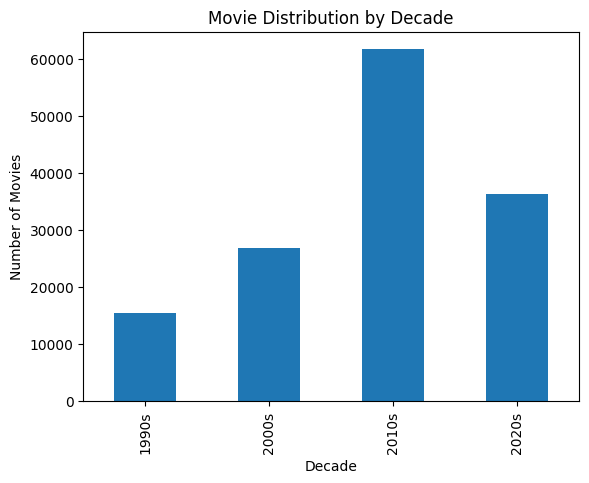

In [134]:
# Create decade column
df_released['decade'] = (df_released['release_year'] // 10) * 10
df_released['decade_label'] = df_released['decade'].astype(str) + 's'

# Show distribution
print("Decade distribution:")
decade_counts = df_released['decade_label'].value_counts().sort_index()
decade_counts.plot(kind='bar', xlabel='Decade', ylabel='Number of Movies', title='Movie Distribution by Decade')
plt.show()

## Preprocessing Steps

### Stemming "Overview" Column

In [135]:
from nltk.stem.porter import PorterStemmer
import re

# Initialize stemmer
ps = PorterStemmer()

def clean_and_stem_overview(text):
    """
    Clean and stem the overview text
    """
    # Remove years (optional - you can keep if you want temporal context)
    text = re.sub(r'\b(19[0-9]{2}|20[0-9]{2})\b', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation (optional)
    text = re.sub(r'[^\w\s]', '', text)
    
    # Split into words and stem each word
    words = text.split()
    stemmed_words = [ps.stem(word) for word in words]
    
    # Join back into a single string
    return ' '.join(stemmed_words)

In [136]:
# Apply to overview column
df2['overview_stemmed'] = df2['overview'].apply(clean_and_stem_overview)

# Preview the new column
df2['overview_stemmed'].head()

0    cobb a skill thief who commit corpor espionag ...
1    the adventur of a group of explor who make use...
2    batman rais the stake in hi war on crime with ...
3    in the 22nd centuri a parapleg marin is dispat...
4    when an unexpect enemi emerg and threaten glob...
Name: overview_stemmed, dtype: object

### Preprocessig for other text columns

In [137]:
def clean_text(text):
    """
    Convert text to lowercase and strip whitespace
    """
    if pd.isna(text):
        return ""
    
    return str(text).lower().strip()

In [138]:
# Define text columns to clean
text_columns = ['genres', 'keywords']

# Apply cleaning function to all text columns
for col in text_columns:
    df2[col] = df2[col].apply(clean_text)

# Preview cleaned data
print(df2[text_columns].head())

                                        genres  \
0           action, science fiction, adventure   
1            adventure, drama, science fiction   
2               drama, action, crime, thriller   
3  action, adventure, fantasy, science fiction   
4           science fiction, action, adventure   

                                            keywords  
0  rescue, mission, dream, airplane, paris, franc...  
1  rescue, future, spacecraft, race against time,...  
2  joker, sadism, chaos, secret identity, crime f...  
3  future, society, culture clash, space travel, ...  
4  new york city, superhero, shield, based on com...  


### Creating the Soup

In [139]:
df2['soup'] = df2['genres'] + ' ' + df2['keywords'] + ' ' + df2['overview_stemmed'] + ' ' + df2['decade_label']
df2['soup'].head()

0    action, science fiction, adventure rescue, mis...
1    adventure, drama, science fiction rescue, futu...
2    drama, action, crime, thriller joker, sadism, ...
3    action, adventure, fantasy, science fiction fu...
4    science fiction, action, adventure new york ci...
Name: soup, dtype: object

In [140]:
df2['soup'].iloc[0]

'action, science fiction, adventure rescue, mission, dream, airplane, paris, france, virtual reality, kidnapping, philosophy, spy, allegory, manipulation, car crash, heist, memory, architecture, los angeles, california, dream world, subconscious cobb a skill thief who commit corpor espionag by infiltr the subconsci of hi target is offer a chanc to regain hi old life as payment for a task consid to be imposs incept the implant of anoth person idea into a target subconsci 2010s'

## Modelling

### Vectorization Steps

In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    stop_words='english',
    min_df=10,      
    max_df=0.8,       # drop terms in ≥75% of the movies
    max_features=15000,             # Keep top 15,000 features
    ngram_range=(1, 2),            # Use unigrams and bigrams
)

X_tfidf = tfidf.fit_transform(df2['soup'].fillna(''))

In [142]:
X_tfidf.shape

(140092, 15000)

In [143]:
print(tfidf.get_feature_names_out()[:300])  # See what words are being used

['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '10 year' '100'
 '100 year' '1000' '10000' '100000' '100th' '10th' '10th anniversari'
 '10yearold' '11' '11 year' '11th' '11yearold' '12' '12 year' '120' '12th'
 '12yearold' '13' '13 year' '13th' '13yearold' '14' '14 year' '1453'
 '14th' '14yearold' '15' '15 year' '150' '15th' '15yearold' '16' '16 year'
 '16mm' '16mm film' '16th' '16th century' '16yearold' '17' '17 year'
 '17th' '17th centuri' '17th century' '17yearold' '18' '18 year' '1800'
 '1890' '18th' '18th centuri' '18th century' '18yearold' '19' '19 short'
 '19 year' '1900s' '1910s' '1920' '1920s' '1930' '1930s' '1936' '1936 39'
 '1940' '1940s' '1950' '1950s' '1960' '1960s' '1970' '1970s' '1980'
 '1980s' '1990' '1990s' '1992' '1992 95' '19th' '19th centuri'
 '19th century' '19yearold' '1st' '20' '20 year' '200' '2000' '20000'
 '2000s' '2010s' '2020s' '20th' '20th anniversari' '20th centuri'
 '20yearold' '21' '21st' '21st centuri' '22' '22nd' '23' '23 year' '23rd'
 '24' '24 hour'

In [144]:
#Construct a reverse map of indices and movie titles
df2 = df2.reset_index(drop=True)
df2['title_lower'] = df2['title'].str.lower().str.strip()
indices = pd.Series(df2['id'].values, index=df2['title_lower']).drop_duplicates()

In [145]:
indices.head()

title_lower
inception           27205
interstellar       157336
the dark knight       155
avatar              19995
the avengers        24428
dtype: int64

### Model Function Creation

In [146]:
from sklearn.neighbors import NearestNeighbors
import difflib

# 1. Fit the NearestNeighbors model (do this once)
#    We ask for 11 neighbours: movie itself + 10 closest others
nn = NearestNeighbors(
    n_neighbors=11,
    metric='cosine',
    algorithm='brute',
    n_jobs=-1
)
nn.fit(X_tfidf)   # X_tfidf is your TF–IDF sparse matrix

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=11)

In [147]:
def get_recommendations(movie_title, nn_model=nn, tfidf_matrix=X_tfidf, df=df2, indices=indices, min_similarity=0.6):
    """
    Get 10 movie recommendations based on a movie title.
    
    Parameters:
    - movie_title: String, the title of the movie to find recommendations for
    - nn_model: Fitted NearestNeighbors model
    - tfidf_matrix: TF-IDF matrix used for training
    - df: DataFrame containing movie data
    - indices: Series mapping movie titles to IDs
    - min_similarity: Minimum similarity threshold for auto-correction
    
    Returns:
    - List of 10 recommended movie titles
    """
    # Normalize the input title
    key = movie_title.lower().strip()
    
    # Check if the title exists in our index
    if key not in indices.index:
        # Try to auto-correct using difflib
        close_matches = difflib.get_close_matches(key, indices.index, n=1, cutoff=min_similarity)
        
        if close_matches:
            corrected_key = close_matches[0]
            corrected_movie_id = indices[[corrected_key]].iloc[0]
            
            # Get the corrected movie title
            corrected_title = df[df['id'] == corrected_movie_id]['title'].iloc[0]
            print(f"Title '{movie_title}' not found. Using closest match: '{corrected_title}'")
            
            key = corrected_key
        else:
            raise KeyError(f"Movie title '{movie_title}' not found and no close match available.")
    
    # Get the movie ID for the title
    movie_id = indices[[key]].iloc[0]
    
    # Find the row index in the DataFrame
    movie_row = df[df['id'] == movie_id]
    if len(movie_row) == 0:
        raise KeyError(f"Movie with ID {movie_id} not found in DataFrame.")
    
    row_idx = movie_row.index[0]
    
    # Get the TF-IDF vector for this movie
    movie_vector = tfidf_matrix[row_idx]
    
    # Find the 11 nearest neighbors (including the movie itself)
    distances, neighbor_indices = nn_model.kneighbors(movie_vector, return_distance=True)
    
    # Remove the first neighbor (it's the movie itself) and get the next 10
    recommended_indices = neighbor_indices[0][1:11]  # Get indices 1-10
    
    # Get the recommended movie titles
    recommended_movies = df.iloc[recommended_indices]['title'].tolist()
    
    return recommended_movies

In [148]:
# Example usage
get_recommendations("Spiderman")

Title 'Spiderman' not found. Using closest match: 'Spider-Man'


['Spider-Man 2',
 'Spider-Man: Across the Spider-Verse',
 'Spider-Man 3',
 'Spider-Man: No Way Home',
 'Spider-Man: Across the Spider-Verse: Across the Comics-Verse',
 'Spider-Man: Across the Spider-Verse: Escape from Spider-Society',
 'Spider-Man: Across the Spider-Verse: Designing Spiders and Spots',
 'Spider-Man: Across the Spider-Verse: Raising a Hero',
 'Spider-Man: Across the Spider-Verse: "I\'mma Do My Own Thing" - Interdimensional Destiny',
 'Spider-Man: Across the Spider-Verse: Across the Worlds: Designing New Dimensions']

## Saving Datasets as Pickle Files

In [149]:
df3 = df2[['id', 'title','overview', 'genres', 'release_year', 'title_lower', 'poster_path']]
df3.head()

,id,title,overview,genres,release_year,title_lower,poster_path
0,27205,Inception,"Cobb, a skilled thief who commits corporate es...","action, science fiction, adventure",2010,inception,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg
1,157336,Interstellar,The adventures of a group of explorers who mak...,"adventure, drama, science fiction",2014,interstellar,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg
2,155,The Dark Knight,Batman raises the stakes in his war on crime. ...,"drama, action, crime, thriller",2008,the dark knight,/qJ2tW6WMUDux911r6m7haRef0WH.jpg
3,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","action, adventure, fantasy, science fiction",2009,avatar,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg
4,24428,The Avengers,When an unexpected enemy emerges and threatens...,"science fiction, action, adventure",2012,the avengers,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg


In [150]:
# Save/Update files as pickle files
# The Dataframe
import pickle

with open('Pkled Files/dataframe.pkl', 'wb') as f:
    pickle.dump(df3, f)

In [151]:
# The Indices
with open('Pkled Files/indices.pkl', 'wb') as f:
    pickle.dump(indices, f)

In [152]:
# The Tfidf Matrix
with open('Pkled Files/tfidf_matrix.pkl', 'wb') as f:
    pickle.dump(X_tfidf, f)